In [92]:
import ccxt
import pandas as pd
from getBestFrHistory import getBestFr
import matplotlib.pyplot as plt
ftx=ccxt.ftx({
            "apiKey":'apiKey',
            "secret":'secretKey',
            'headers':{
                'FTX-SUBACCOUNT':'subaccountName'
            }
        })
tf='1h'
from datetime import datetime,timedelta
dfsDif=[]
dfsDif2=[]
for j in range(1,30):
    (lower,higher)=getBestFr(j*24)
    print(lower,higher)
    lowSymbols=lower['symbol'].to_list()
    highSymbols=higher['symbol'].to_list()
    for i,symbol in enumerate(lowSymbols):
        lowSymbols[i]=lowSymbols[i].replace('/USD:USD','-PERP')
    for i,symbol in enumerate(highSymbols):
        highSymbols[i]=highSymbols[i].replace('/USD:USD','-PERP')
    onehago=datetime.now()-timedelta(hours=j*24)
    onehago=onehago.replace(second=0, microsecond=0, minute=0, hour=onehago.hour)+timedelta(hours=onehago.minute//30)
    print(onehago)
    onehago=onehago.timestamp()*1000
    lowSymbols.extend(highSymbols)
    dfs=[]
    for symbol in lowSymbols:
        df=ftx.fetch_ohlcv(symbol,timeframe='5m',since=onehago,limit=16*8)
        df=pd.DataFrame(df)
        df.columns=['timestamp','open','high','low','close','volume']
        df['timestamp']=[datetime.fromtimestamp((x/1000)) for x in df['timestamp']]
        df=df.set_index('timestamp')
        dfs.append(df)
    lowDf=dfs[0:5]
    highDf=dfs[5:10]
    # plt.figure(figsize=(12,8))
    for idx,i in enumerate(lowDf):
        i['close']=(i['close']-i['close'].min())/(i['close'].max()-i['close'].min())
        i['close']=i['close']-i['close'][0]
        # i['close'].plot(label=f'{lowSymbols[idx]}')
    dfDif=pd.DataFrame()
    dfDif['close']=lowDf[0]['close']
    for i in range(1,(len(lowDf))):
        dfDif['close']+=lowDf[i]['close']
    # dfDif['close'].plot(label='diff')
    # plt.legend()
    # plt.show()
    # plt.figure(figsize=(12,8))
    for idx,i in enumerate(highDf):
        i['close']=(i['close']-i['close'].min())/(i['close'].max()-i['close'].min())
        i['close']=i['close']-i['close'][0]
        # i['close'].plot(label=f'{lowSymbols[idx+4]}')
    dfDif2=pd.DataFrame()
    dfDif2['close']=highDf[0]['close']
    for i in range(1,len(highDf)):
        dfDif2['close']+=highDf[i]['close']
    # dfDif2['close'].plot
    #label='diff')
    # plt.legend()
    # plt.show()
    dfsDif.append(dfDif)
    dfsDif2.append(dfDif2)

    fundingRate        symbol
9     -0.000309  BAND/USD:USD
25    -0.000135   GST/USD:USD
24    -0.000056   GMT/USD:USD
18    -0.000049   ETC/USD:USD
32    -0.000047  LUNC/USD:USD     fundingRate         symbol
2      0.000029   ALGO/USD:USD
44     0.000015  SUSHI/USD:USD
10     0.000006    BCH/USD:USD
15     0.000004   DOGE/USD:USD
22     0.000004    FTT/USD:USD
2022-11-05 02:00:00
    fundingRate        symbol
9     -0.000309  BAND/USD:USD
25    -0.000135   GST/USD:USD
24    -0.000056   GMT/USD:USD
18    -0.000049   ETC/USD:USD
32    -0.000047  LUNC/USD:USD     fundingRate         symbol
2      0.000029   ALGO/USD:USD
44     0.000015  SUSHI/USD:USD
10     0.000006    BCH/USD:USD
15     0.000004   DOGE/USD:USD
22     0.000004    FTT/USD:USD
2022-11-04 02:00:00
    fundingRate        symbol
9     -0.000309  BAND/USD:USD
25    -0.000135   GST/USD:USD
24    -0.000056   GMT/USD:USD
18    -0.000049   ETC/USD:USD
32    -0.000047  LUNC/USD:USD     fundingRate         symbol
2      0.000029  

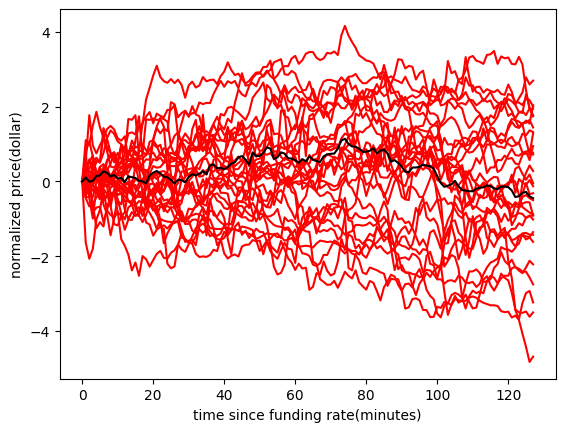

In [93]:
full_diff=pd.DataFrame()
dfs_dif[0]=dfs_dif[0].reset_index()
full_diff['close']=dfs_dif[0]['close']
full_diff['close']=full_diff['close']*0
for i in dfs_dif:
    i=i.reset_index()
    full_diff['close']+=i['close']
full_diff['close']=full_diff['close']/(len(dfs_dif)/2)
for i in dfs_dif:
    i=i.reset_index()
    i['close'].plot(color='red')
full_diff['close'].plot(color='black')
plt.ylabel('normalized price(dollar)')
plt.xlabel('time since funding rate(minutes)')
plt.show()

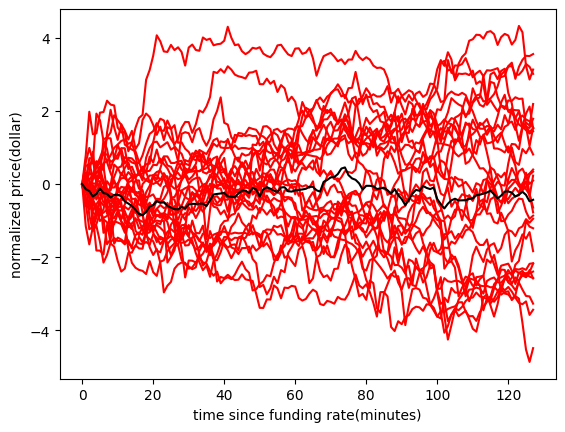

In [94]:
full_diff2=pd.DataFrame()
dfs_dif2[0]=dfs_dif2[0].reset_index()
full_diff2['close']=dfs_dif2[0]['close']
full_diff2['close']=full_diff2['close']*0
for i in dfs_dif2:
    i=i.reset_index()
    full_diff2['close']+=i['close']
full_diff2['close']=full_diff2['close']/(len(dfs_dif2)/2)
for i in dfs_dif2:
    i=i.reset_index()
    i['close'].plot(color='red')
full_diff2['close'].plot(color='black')
plt.ylabel('normalized price(dollar)')
plt.xlabel('time since funding rate(minutes)')
plt.show()

In [78]:
dfs_dif

[             timestamp     close
 0  2022-11-05 01:00:00  0.000000
 1  2022-11-05 01:15:00  1.155321
 2  2022-11-05 01:30:00  0.981853
 3  2022-11-05 01:45:00  2.095150
 4  2022-11-05 02:00:00  1.372472
 5  2022-11-05 02:15:00  2.121016
 6  2022-11-05 02:30:00  2.301230
 7  2022-11-05 02:45:00  2.895339
 8  2022-11-05 03:00:00  3.074312
 9  2022-11-05 03:15:00  2.997194
 10 2022-11-05 03:30:00  3.057150
 11 2022-11-05 03:45:00  3.340797,
                         close
 timestamp                    
 2022-11-04 01:00:00  0.000000
 2022-11-04 01:15:00  1.474172
 2022-11-04 01:30:00  1.795677
 2022-11-04 01:45:00  2.694945
 2022-11-04 02:00:00  2.658952
 2022-11-04 02:15:00  1.814724
 2022-11-04 02:30:00  2.410192
 2022-11-04 02:45:00  2.526245
 2022-11-04 03:00:00  4.201921
 2022-11-04 03:15:00  3.934593
 2022-11-04 03:30:00  3.460110
 2022-11-04 03:45:00  3.331431,
                         close
 timestamp                    
 2022-11-03 01:00:00  0.000000
 2022-11-03 01:15:00  1.35547

In [79]:
dfs_dif2

[             timestamp     close
 0  2022-11-05 01:00:00  0.000000
 1  2022-11-05 01:15:00  1.814536
 2  2022-11-05 01:30:00  2.348864
 3  2022-11-05 01:45:00  3.783711
 4  2022-11-05 02:00:00  3.503192
 5  2022-11-05 02:15:00  3.426196
 6  2022-11-05 02:30:00  1.347325
 7  2022-11-05 02:45:00  2.170552
 8  2022-11-05 03:00:00  1.792587
 9  2022-11-05 03:15:00  1.437782
 10 2022-11-05 03:30:00  1.490979
 11 2022-11-05 03:45:00  1.662256,
                         close
 timestamp                    
 2022-11-04 01:00:00  0.000000
 2022-11-04 01:15:00  2.358261
 2022-11-04 01:30:00  1.834254
 2022-11-04 01:45:00  1.972682
 2022-11-04 02:00:00  2.351379
 2022-11-04 02:15:00  0.453000
 2022-11-04 02:30:00  1.366152
 2022-11-04 02:45:00  1.485949
 2022-11-04 03:00:00  3.160819
 2022-11-04 03:15:00  3.091270
 2022-11-04 03:30:00  3.330276
 2022-11-04 03:45:00  3.273776,
                         close
 timestamp                    
 2022-11-03 01:00:00  0.000000
 2022-11-03 01:15:00  2.22252